In [60]:
# Installing some packages required, that are not available on Google Colab by default.
!pip install -q  tensorflow_decision_forests
!pip install -q  tf_keras

In [61]:
# Importing all the required modules at once.
import os
import pandas as pd
import numpy as np
import tensorflow as tf
import tensorflow_decision_forests as tfdf
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, log_loss
import matplotlib.pyplot as plt
import seaborn as sns

In [76]:
# Load the provided excel file into the code converting it into a Pandas dataframe.
data = pd.read_excel("Data-RF.xlsx")
data

,Lab-Test1(30),Lab-Test2(24),Midsem Test (90),Gender,Attendance,Grade
0,13.00,24,66.0,Male,High,A
1,15.00,24,67.0,Female,High,A
2,5.25,24,45.0,Male,High,B-
3,2.75,19,34.0,Male,High,C-
4,7.25,24,30.0,Male,High,C-
...,...,...,...,...,...,...
495,10.50,24,48.0,Male,Low,B-
496,11.00,24,31.0,Female,Moderate,C
497,11.75,24,47.0,Male,High,B-
498,0.00,20,0.0,Female,Low,E


In [77]:
# Performing Label Encoding on our target column is ‘Grade’
label_encoder = LabelEncoder()
data['Grade'] = label_encoder.fit_transform(data['Grade'])

In [78]:
# Splitting the given dataset into training and testing sets. Using 70-30 split.
train_data, test_data = train_test_split(data, test_size=0.3, random_state=16)

In [79]:
# Train a random forest model using TensorFlow’s decision forest, fit the model using training dataset.
train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(train_data, label="Grade")

model = tfdf.keras.RandomForestModel()
model.fit(train_ds)

Use /tmp/tmp_1pfaj_e as temporary training directory
Reading training dataset...
Training dataset read in 0:00:00.276429. Found 350 examples.
Training model...
Model trained in 0:00:00.319596
Compiling model...
Model compiled.


In [80]:
# Evaluate the model using test set.
test_ds = tfdf.keras.pd_dataframe_to_tf_dataset(test_data, label="Grade")

model.compile (metrics=["accuracy"])
evaluation = model.evaluate(test_ds, return_dict=True)
print("Evaluation results:", evaluation)

1/1 [==============================] - 0s 173ms/step - loss: 0.0000e+00 - accuracy: 0.8333
Evaluation results: {'loss': 0.0, 'accuracy': 0.8333333134651184}


In [81]:
#Now doing the same with data without pre-processing (label encoding).

# Load the provided excel file into the code converting it into a Pandas dataframe.
data2 = pd.read_excel("Data-RF.xlsx")

# Splitting the given dataset into training and testing sets. Using 70-30 split.
train_data, test_data = train_test_split(data, test_size=0.3, random_state=16)

# Train a random forest model using TensorFlow’s decision forest, fit the model using training dataset.
train_ds_pd = tfdf.keras.pd_dataframe_to_tf_dataset(train_data, label="Grade")

model2 = tfdf.keras.RandomForestModel()
model2.fit(train_ds)

# Evaluate the model using test set.
test_ds_pd = tfdf.keras.pd_dataframe_to_tf_dataset(test_data, label="Grade")

model2.compile (metrics=["accuracy"])
evaluation = model2.evaluate(test_ds_pd, return_dict=True)
print("Evaluation results:", evaluation)

Use /tmp/tmpbt6xlylz as temporary training directory
Reading training dataset...
Training dataset read in 0:00:00.281340. Found 350 examples.
Training model...
Model trained in 0:00:00.228044
Compiling model...
Model compiled.


1/1 [==============================] - 0s 156ms/step - loss: 0.0000e+00 - accuracy: 0.8333
Evaluation results: {'loss': 0.0, 'accuracy': 0.8333333134651184}


We can observe in the above results that the random forest model gave same accuracy with and without pre-processing (label encoding). So, we observed that Tensorflow decision forests natively handle numerical and categorical data and therefore no encoding would be required.

In [83]:
# Visualize the first tree in the trained model (with depth = 3).
tfdf.model_plotter.plot_model_in_colab(model, tree_idx=0, max_depth=3)

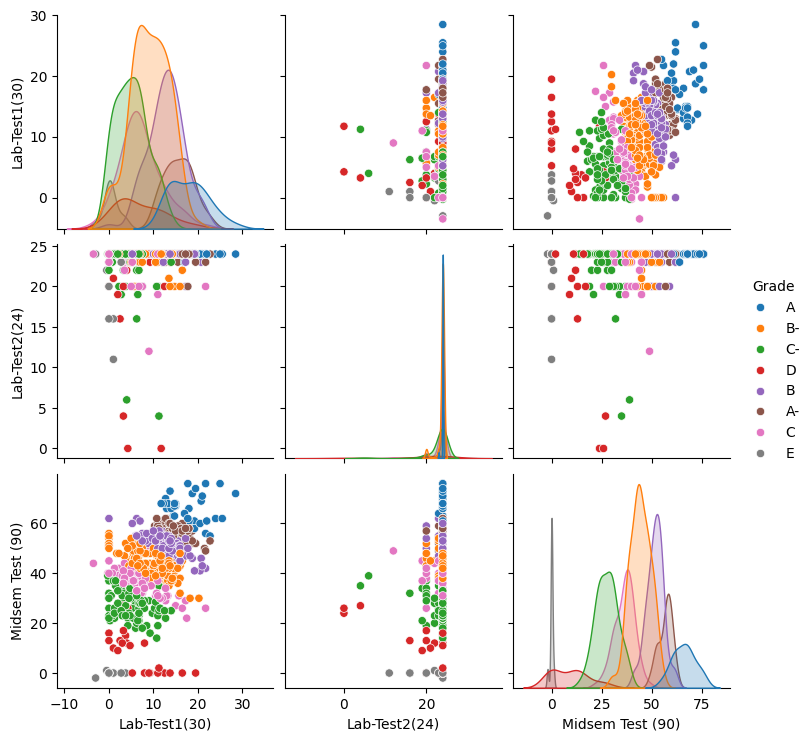

In [84]:
# Load the dataset again.
data2 = pd.read_excel("Data-RF.xlsx")

# Visualize the Hypothesis space by producing the scatter plot of the dataset.
# Create scatter plots using Seaborn
sns.pairplot(data2, hue='Grade', vars=['Lab-Test1(30)', 'Lab-Test2(24)', 'Midsem Test (90)'], diag_kind='kde')

# Creating scatter plots with non-numerical attributes other than target variable. Can be used if required.
#sns.pairplot(data2, hue='Gender', vars=['Lab-Test1(30)', 'Lab-Test2(24)', 'Midsem Test (90)'], diag_kind='kde')
#sns.pairplot(data2, hue='Attendance', vars=['Lab-Test1(30)', 'Lab-Test2(24)', 'Midsem Test (90)'], diag_kind='kde')

# Show the plots
plt.show()

In [85]:
# Implement the Gradient boosted decision trees and compare their accuracies with the Random forest implementation having 30 DTs.

# Random Forest model
rf_model = tfdf.keras.RandomForestModel(num_trees=30)
rf_model.fit(train_ds)
rf_pred_probs = rf_model.predict(test_ds)
rf_pred_labels = np.argmax(rf_pred_probs, axis=1)

# Gradient Boosted Decision Trees model
gbdt_model = tfdf.keras.GradientBoostedTreesModel()
gbdt_model.fit(train_ds)
gbdt_pred_probs = gbdt_model.predict(test_ds)
gbdt_pred_labels = np.argmax(gbdt_pred_probs, axis=1)

# Evaluate Random Forest
rf_accuracy = accuracy_score(test_data['Grade'], rf_pred_labels)
rf_log_loss = log_loss(test_data['Grade'], rf_pred_probs)

# Evaluate Gradient Boosted Decision Trees
gbdt_accuracy = accuracy_score(test_data['Grade'], gbdt_pred_labels)
gbdt_log_loss = log_loss(test_data['Grade'], gbdt_pred_probs)

# Print results
print("Random Forest Accuracy:", rf_accuracy)
print("Random Forest Log Loss:", rf_log_loss)
print("Gradient Boosted Decision Trees Accuracy:", gbdt_accuracy)
print("Gradient Boosted Decision Trees Log Loss:", gbdt_log_loss)

Use /tmp/tmpc8jo12cj as temporary training directory
Reading training dataset...
Training dataset read in 0:00:00.274428. Found 350 examples.
Training model...
Model trained in 0:00:00.041967
Compiling model...
Model compiled.
1/1 [==============================] - 0s 38ms/step
Use /tmp/tmp5y5n3ocv as temporary training directory
Reading training dataset...
Training dataset read in 0:00:00.303309. Found 350 examples.
Training model...
Model trained in 0:00:00.431415
Compiling model...
Model compiled.
1/1 [==============================] - 0s 47ms/step
Random Forest Accuracy: 0.8266666666666667
Random Forest Log Loss: 0.4081617495158924
Gradient Boosted Decision Trees Accuracy: 0.84
Gradient Boosted Decision Trees Log Loss: 0.4689027922845228


Observation:
We can clearly see from the output obtained from the above cell that, both Accuracy and Log Loss are a little more in magnitude for Gradient Boosted Decision Trees than Random Forest for 30 DTs.

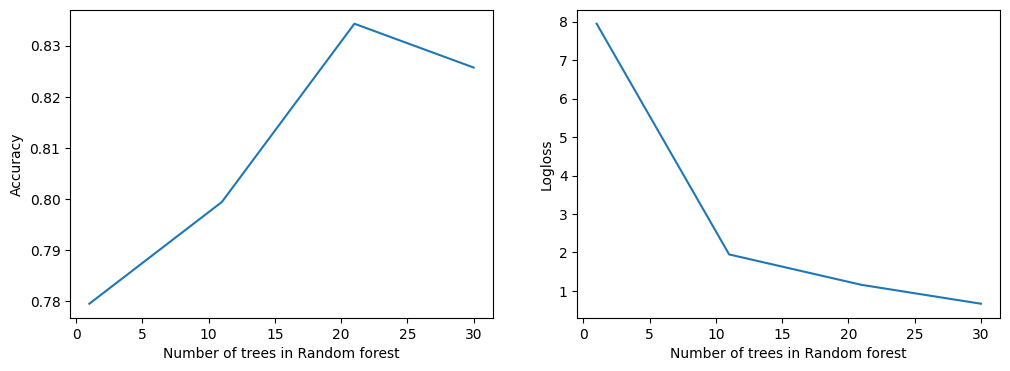

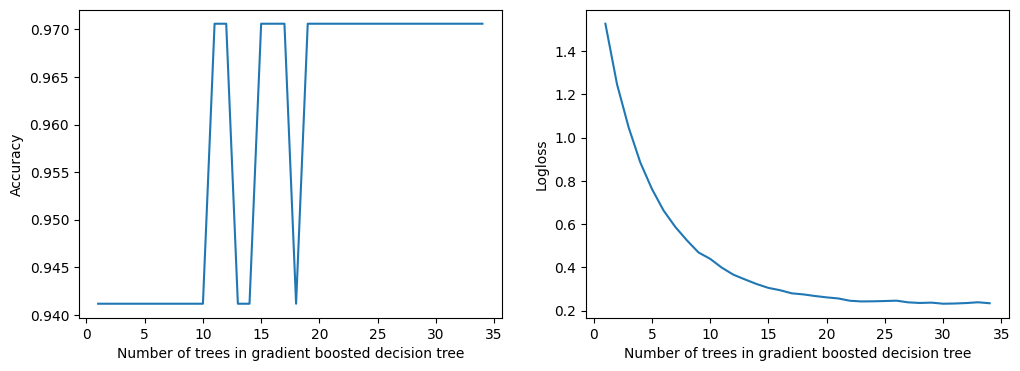

In [86]:
# Now, logging the outputs obtained above and Plotting the relation between Accuracy and number of DTs and Log Loss and number of DTs for both RF and GBDTs.

logs1 = rf_model.make_inspector().training_logs()
logs2 = gbdt_model.make_inspector().training_logs()
plt.figure(figsize=(12,4))

plt.subplot(1, 2, 1)
plt.plot([log.num_trees for log in logs1], [log.evaluation.accuracy for log in logs1])
plt.xlabel("Number of trees in Random forest")
plt.ylabel("Accuracy")

plt.subplot(1, 2, 2)
plt.plot([log.num_trees for log in logs1], [log.evaluation.loss for log in logs1])
plt.xlabel("Number of trees in Random forest")
plt.ylabel("Logloss")

plt.show()

plt.figure(figsize=(12,4))

plt.subplot(1, 2, 1)
plt.plot([log.num_trees for log in logs2], [log.evaluation.accuracy for log in logs2])
plt.xlabel("Number of trees in gradient boosted decision tree")
plt.ylabel("Accuracy")

plt.subplot(1, 2, 2)
plt.plot([log.num_trees for log in logs2], [log.evaluation.loss for log in logs2])
plt.xlabel("Number of trees in gradient boosted decision tree")
plt.ylabel("Logloss")

plt.show()

In [91]:
# Training accuracy for GBDT model.
gbdt_model.compile(metrics=["accuracy"])
evaluation = gbdt_model.evaluate(train_ds, return_dict=True)
print("Training")
print()

#for name, value in evaluation.items():
  #print(f"The training accuracy for gradient boosting trees {name} : {value:.4f}")

# Testing accuracy for GBDT model.
gbdt_model.compile(metrics=["accuracy"])
evaluation = gbdt_model.evaluate(test_ds, return_dict=True)
print("Testing")
print()

#for name, value in evaluation.items():
  #print(f" The testing accuracy for gradient boosting trees {name}: {value:.4f}")

1/1 [==============================] - 0s 150ms/step - loss: 0.0000e+00 - accuracy: 0.9943
Training

1/1 [==============================] - 0s 138ms/step - loss: 0.0000e+00 - accuracy: 0.8533
Testing



In [88]:
# Varying the number of trees and maximum depth hyper-parameters to obtain a reasonable accuracy.

%%capture
array2 = [5, 10, 15]
num_trees = []
max_depth = []
list_test_accuracy = []

for i in range(5, 21, 5):
  for j in array2:
    # Random Forest model
    gbdt_model = tfdf.keras.GradientBoostedTreesModel(num_trees=i, verbose=2, categorical_algorithm = "CART",max_depth = j)
    gbdt_model.fit(train_ds)
    # Evaluate the Random Forest model.
    gbdt_model.evaluate(test_ds)
    gbdt_model.compile(metrics=["accuracy"])
    gbdt_evaluation = gbdt_model.evaluate(test_ds, return_dict=True)
    # Evaluate Random Forest
    print(gbdt_evaluation)
    logs2 = gbdt_model.make_inspector().training_logs()
    for log in logs2:
            if(log.evaluation.accuracy >= 0.85):
                  max_depth.append(j)
                  num_trees.append(log.num_trees)
                  list_test_accuracy.append(log.evaluation.accuracy)

In [89]:
# Printing the sets of hyper-parameters giving reasonable accuracy (>=85%)
for i in range(0, len(num_trees), 1):
  print("No. of trees =", num_trees[i], "  Max Depth =", max_depth[i], "  Accuracy =", list_test_accuracy[i])

No. of trees = 1   Max Depth = 5   Accuracy = 0.8823529481887817
No. of trees = 2   Max Depth = 5   Accuracy = 0.8823529481887817
No. of trees = 3   Max Depth = 5   Accuracy = 0.9117646813392639
No. of trees = 4   Max Depth = 5   Accuracy = 0.9117646813392639
No. of trees = 5   Max Depth = 5   Accuracy = 0.9117646813392639
No. of trees = 1   Max Depth = 10   Accuracy = 0.9411764740943909
No. of trees = 2   Max Depth = 10   Accuracy = 0.9117646813392639
No. of trees = 3   Max Depth = 10   Accuracy = 0.9411764740943909
No. of trees = 4   Max Depth = 10   Accuracy = 0.9411764740943909
No. of trees = 5   Max Depth = 10   Accuracy = 0.9411764740943909
No. of trees = 1   Max Depth = 15   Accuracy = 0.9411764740943909
No. of trees = 2   Max Depth = 15   Accuracy = 0.9117646813392639
No. of trees = 3   Max Depth = 15   Accuracy = 0.9411764740943909
No. of trees = 4   Max Depth = 15   Accuracy = 0.9411764740943909
No. of trees = 5   Max Depth = 15   Accuracy = 0.9411764740943909
No. of trees = 